In [1]:
%matplotlib inline

In [2]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/my_dataset_combined.csv')
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data

,id,name,artist_ids,artists,aritsts_mean_popularity,artists_followers_combined,release_date,explicit,key,mode,loudness,tempo,time_signature,duration_ms,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,popularity
0,7HTivtjSCHHia7EmOdxfMg,Shivers,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],91.0,1.024779e+08,2023-06-02,0,2,1,-2.724,141.020,4,207853,0.788,0.859,0.0856,0.28100,0.000000,0.0424,0.822,0
1,4C4Xa4ChCQr7cfTFdd5abC,Only Dying - Demo,['2UazAtjfzqBF0Nho2awK4z'],['Stone Temple Pilots'],67.0,3.235051e+06,1992-09-29,0,9,0,-8.992,143.499,4,319693,0.430,0.849,0.0563,0.00547,0.000042,0.0727,0.279,41
2,5VL7pScLlKe4MbB8EAivgA,Always,['20JZFwl6HVl6yg8a4H3ZqK'],['Panic! At The Disco'],77.0,1.186252e+07,2011-03-18,0,9,1,-7.651,88.968,4,153653,0.408,0.499,0.0323,0.66500,0.000000,0.1100,0.554,54
3,49sXkAcR5LvOrtq5Qcn5cf,Superpower (feat. Frank Ocean),"['6vWDO969PvNqNYHIOW5v0m', '2h93pZq0e7k5yf4dyw...","['Beyoncé', 'Frank Ocean']",85.0,3.960430e+07,2014-11-24,0,0,1,-11.540,80.307,3,276560,0.525,0.334,0.0686,0.64100,0.000000,0.1140,0.185,59
4,1nXZnTALNXiPlvXotqHm66,A BOY IS A GUN*,['4V8LLVI7PbaPR0K2TGSxFF'],"['Tyler, The Creator']",87.0,1.171205e+07,2019-05-17,1,2,0,-8.302,79.568,4,210253,0.417,0.689,0.1780,0.57500,0.000000,0.4960,0.505,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,5MoA9NmBrDrf0oHfeRPyWV,Heart Shaped Box - Original Steve Albini 1993 Mix,['6olE6TJLqED3rqDCT0FyPh'],['Nirvana'],81.0,1.769674e+07,1993-09-21,0,6,1,-11.494,99.589,4,281760,0.535,0.725,0.0307,0.01150,0.097800,0.0824,0.524,40
8401,2GAqIzPU7v3kfvY4hZQ9jm,Light On In The Kitchen,['371jpyGdoChzUASOIG2ECV'],['Ashley McBryde'],59.0,1.290554e+05,2023-02-24,0,5,1,-7.694,165.931,4,212120,0.629,0.548,0.0334,0.47100,0.000022,0.1040,0.582,71
8402,1T8P8Ip4NU5c9TQ6qpxkj0,Unhinged,['03R6r9e5DPFzPQ0UJojAIn'],['LSPLASH'],53.0,1.081210e+05,2022-08-10,0,6,0,-23.943,180.354,4,194667,0.549,0.125,0.0586,0.31200,0.939000,0.2560,0.124,52
8403,5LvqzuJCNpi2pNkJAX8mBT,Dionysus,['3Nrfpe0tUJi4K4DXYWgMUX'],['BTS'],90.0,6.585772e+07,2020-02-21,0,7,1,-2.769,176.084,4,249215,0.502,0.910,0.1070,0.04000,0.000000,0.3190,0.588,64


In [4]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [5]:
target = 'popularity'
 
audio_features_general = ['key', 'loudness', 'tempo', 'duration_ms']
audio_characteristics = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

features = [feature for feature in data.columns if feature not in [target]]

# <center>Data Cleaning</center>

In [6]:
data.isna().sum()

id                              0
name                            0
artist_ids                      0
artists                         0
aritsts_mean_popularity         0
artists_followers_combined      0
release_date                  229
explicit                        0
key                             0
mode                            0
loudness                        0
tempo                           0
time_signature                  0
duration_ms                     0
danceability                    0
energy                          0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
popularity                      0
dtype: int64

In [7]:
data = data.dropna().reset_index(drop=True)

In [8]:
data = data[data['tempo'] != 0]
data = data[data['time_signature'] != 0]; data = data[data['time_signature'] != 1]

# <center>Exploratory Data Analysis</center>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8116 entries, 0 to 8175
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          8116 non-null   object        
 1   name                        8116 non-null   object        
 2   artist_ids                  8116 non-null   object        
 3   artists                     8116 non-null   object        
 4   aritsts_mean_popularity     8116 non-null   float64       
 5   artists_followers_combined  8116 non-null   float64       
 6   release_date                8116 non-null   datetime64[ns]
 7   explicit                    8116 non-null   int64         
 8   key                         8116 non-null   int64         
 9   mode                        8116 non-null   int64         
 10  loudness                    8116 non-null   float64       
 11  tempo                       8116 non-null   float64       
 1

In [10]:
data.iloc[:, 3:].describe()

,aritsts_mean_popularity,artists_followers_combined,release_date,explicit,key,mode,loudness,tempo,time_signature,duration_ms,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,popularity
count,8116.000000,8.116000e+03,8116,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8.116000e+03,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000
mean,74.849805,1.982534e+07,2014-07-08 04:11:35.515032064,0.396870,5.111508,0.614465,-7.211632,123.303940,3.958600,2.003431e+05,0.606987,0.647328,0.121202,0.215864,0.051275,0.191328,0.453382,53.007023
min,0.000000,1.200000e+01,1965-06-01 00:00:00,0.000000,0.000000,0.000000,-34.475000,31.801000,3.000000,1.542900e+04,0.053900,0.001590,0.022900,0.000001,0.000000,0.022600,0.002150,0.000000
25%,65.000000,1.412298e+06,2014-06-21 00:00:00,0.000000,2.000000,0.000000,-8.521250,97.987250,4.000000,1.637718e+05,0.492750,0.518000,0.039275,0.015800,0.000000,0.101000,0.278000,40.000000
50%,79.500000,8.542775e+06,2019-04-19 00:00:00,0.000000,5.000000,1.000000,-6.552500,123.052500,4.000000,1.966600e+05,0.613000,0.661000,0.064600,0.096450,0.000002,0.130000,0.439000,56.000000
75%,86.000000,2.569191e+07,2022-05-20 00:00:00,1.000000,8.000000,1.000000,-5.053000,144.643500,4.000000,2.305570e+05,0.733000,0.803000,0.159000,0.328000,0.000511,0.241000,0.616000,68.000000
max,100.000000,1.915036e+08,2023-06-11 00:00:00,1.000000,11.000000,1.000000,0.496000,219.852000,5.000000,1.549965e+06,0.979000,0.997000,0.962000,0.995000,0.995000,0.990000,0.978000,100.000000
std,15.036223,2.626921e+07,NaN,0.489279,3.625814,0.486751,3.352468,30.145434,0.279532,6.449101e+04,0.165744,0.203151,0.124746,0.263919,0.175773,0.147381,0.225965,20.604992


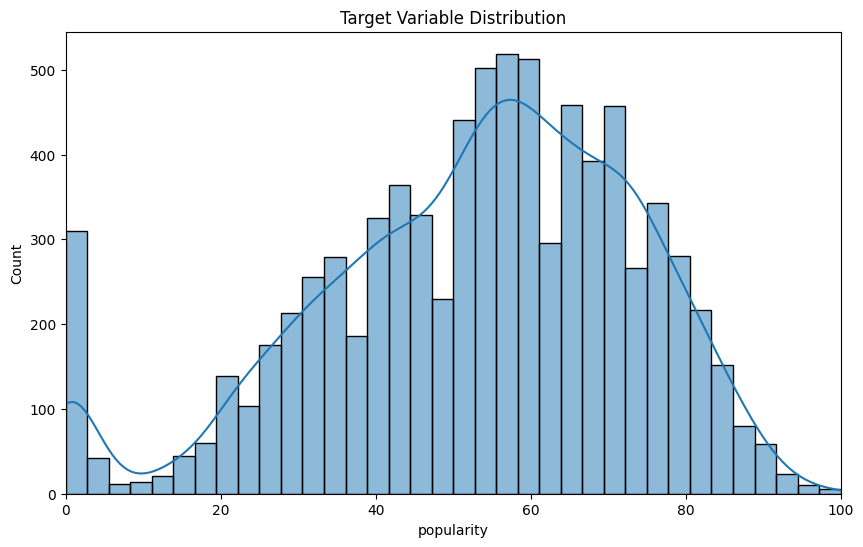

In [11]:
plt.figure(figsize=[10, 6])
sns.histplot(data['popularity'], kde=True)
plt.xlim((0, 100))
plt.title('Target Variable Distribution')
plt.show()

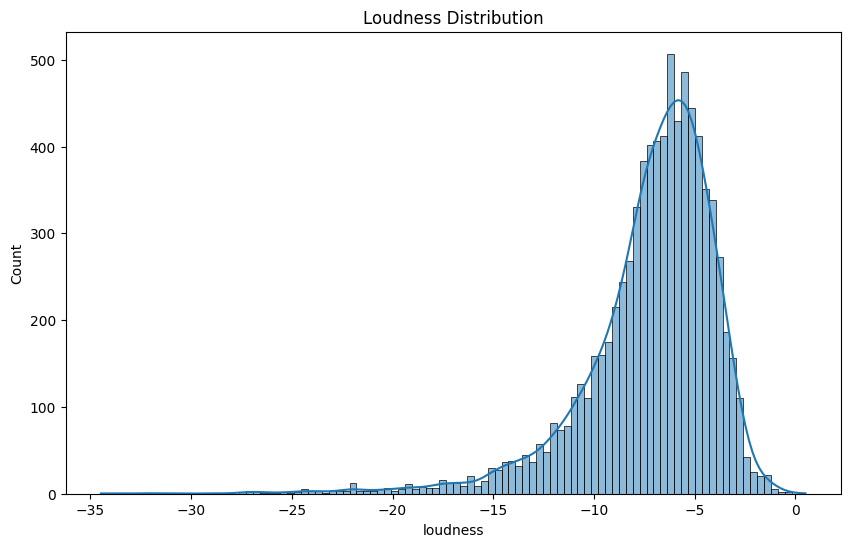

In [12]:
plt.figure(figsize=[10, 6])
sns.histplot(data['loudness'], kde=True)
# plt.xlim((0, 100))
plt.title('Loudness Distribution')
plt.show()

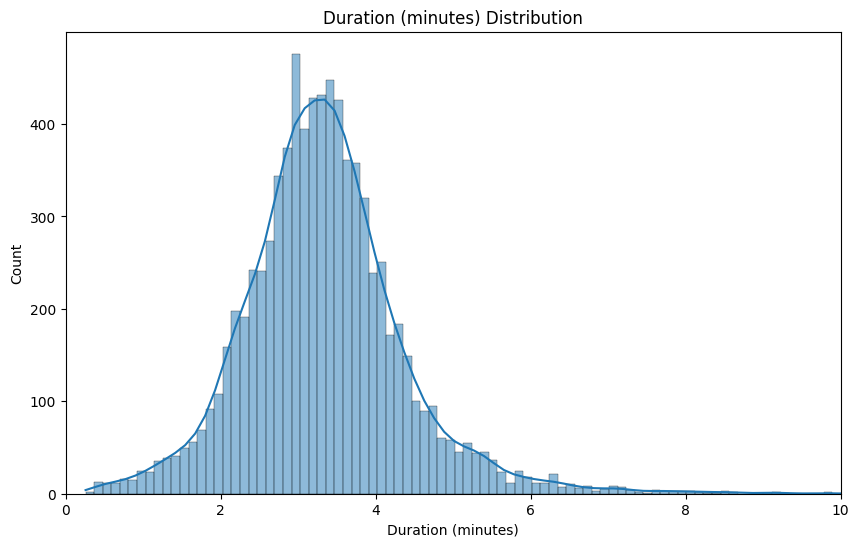

In [13]:
plt.figure(figsize=[10, 6])
sns.histplot(data['duration_ms'] / 1000 / 60, kde=True)
plt.xlim((0, 10))
plt.title('Duration (minutes) Distribution')
plt.xlabel("Duration (minutes)")
plt.show()

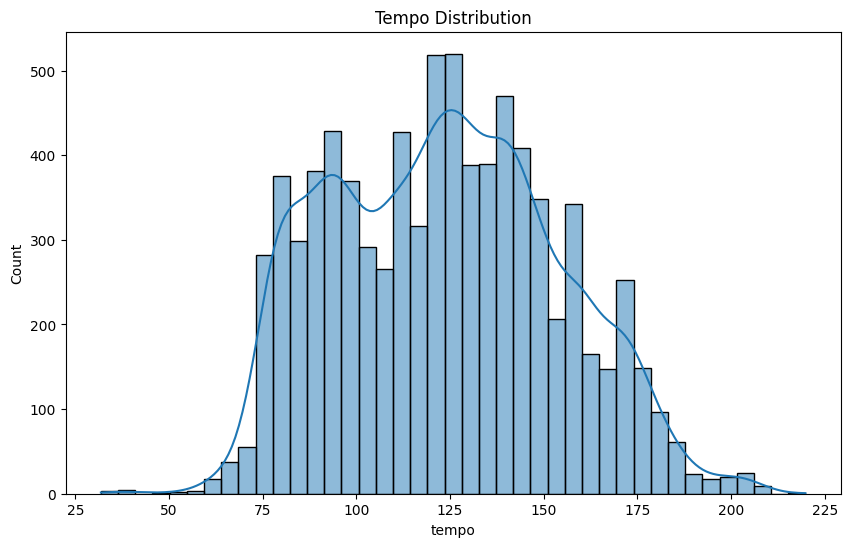

In [14]:
plt.figure(figsize=[10, 6])
sns.histplot(data['tempo'], kde=True)
# plt.xlim((0, 10))
plt.title('Tempo Distribution')
# plt.xlabel("Duration (minutes)")
plt.show()

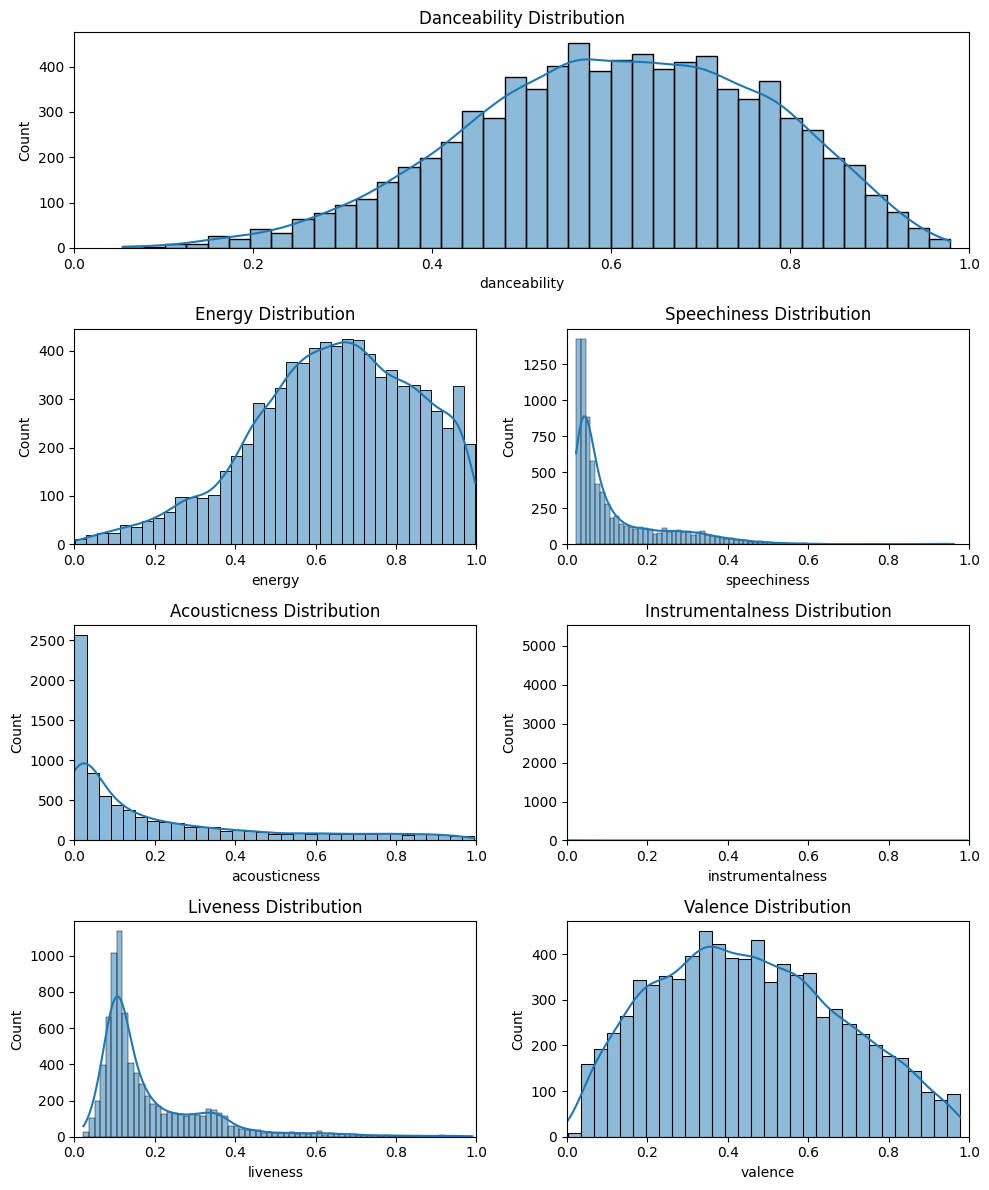

In [15]:
plt.figure(figsize=[10, 12])

plt.subplot(4, 1, 1)
sns.histplot(data[audio_characteristics[0]], kde=True)
plt.xlim((0, 1))
plt.title(f'{audio_characteristics[0].title()} Distribution')

for i, feature in enumerate(audio_characteristics[1:], start=3):
    plt.subplot(4, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.xlim((0, 1))
    plt.title(f'{feature.title()} Distribution')
#     plt.show()
plt.tight_layout()
plt.show()

<Axes: xlabel='key', ylabel='count'>

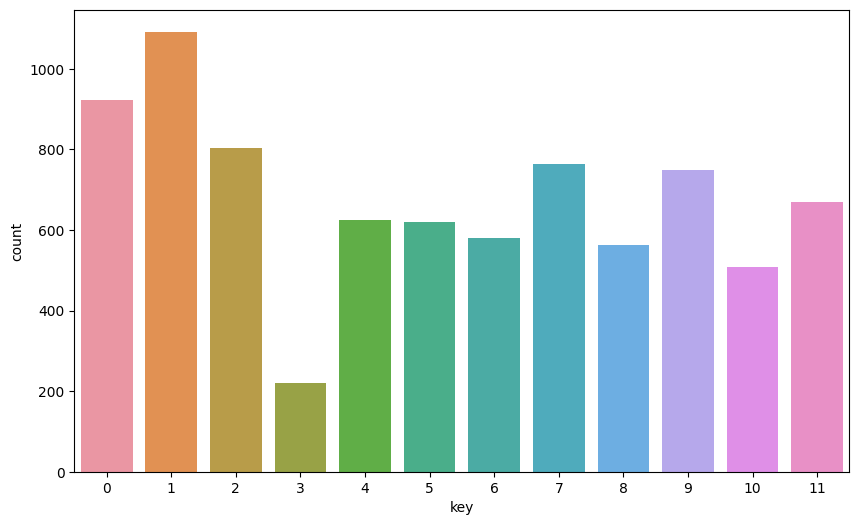

In [16]:
plt.figure(figsize=[10, 6])
sns.countplot(data, x='key')

<Axes: xlabel='mode', ylabel='count'>

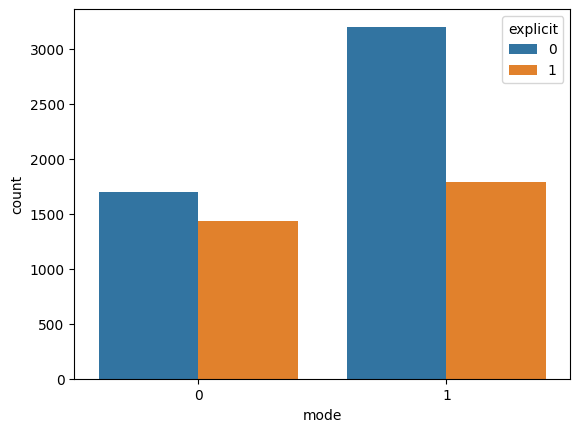

In [17]:
sns.countplot(data, x='mode', hue='explicit')

In [18]:
numeric_columns = [i for i in range(len(features)) if pd.api.types.is_numeric_dtype(data.iloc[:, i])]
len(numeric_columns)

16

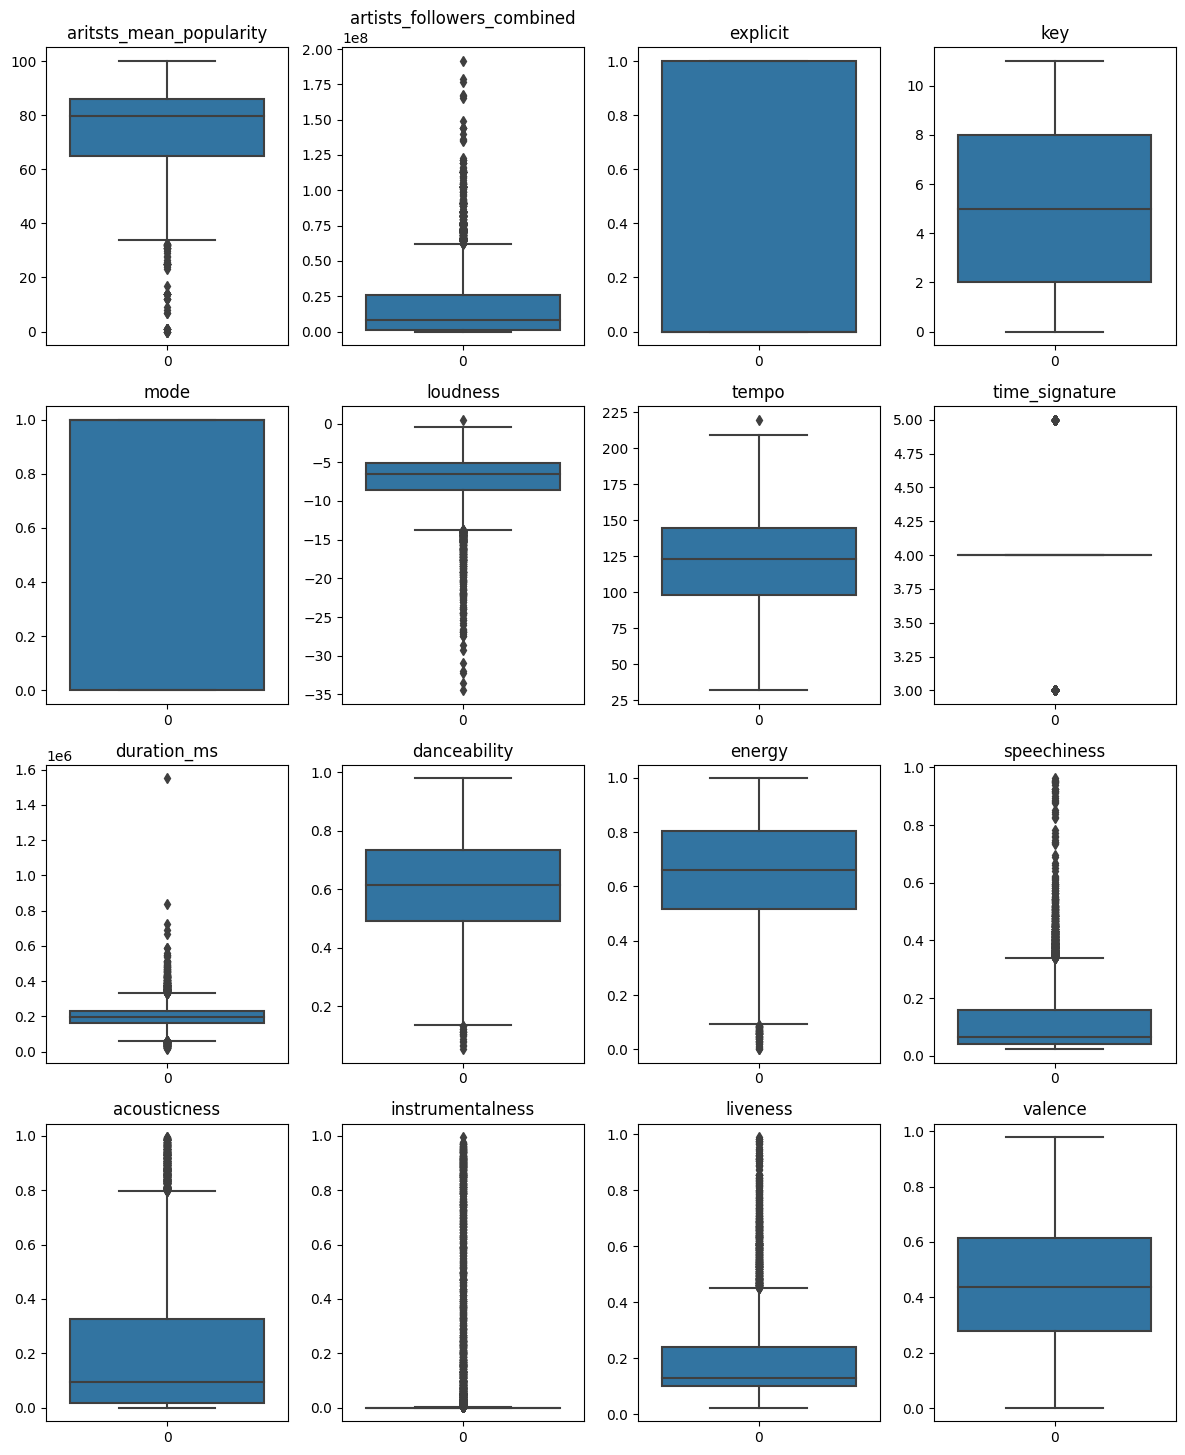

In [19]:
plt.figure(figsize=(12, 18))

for i, column_index in enumerate(numeric_columns, start=1):
    if pd.api.types.is_numeric_dtype(data.iloc[:, column_index]):
        plt.subplot(5, 4, i)
        sns.boxplot(data[data.columns[column_index]])
        plt.title(data.columns[column_index])#.title())
    
plt.tight_layout()
plt.show()

# <center>Features Selection & Engineering</center>

In [20]:
# can't be used
data = data.drop(['id', 'artist_ids'], axis=1)

# not numeric, hard to encode
data = data.drop(['name', 'artists'], axis=1)

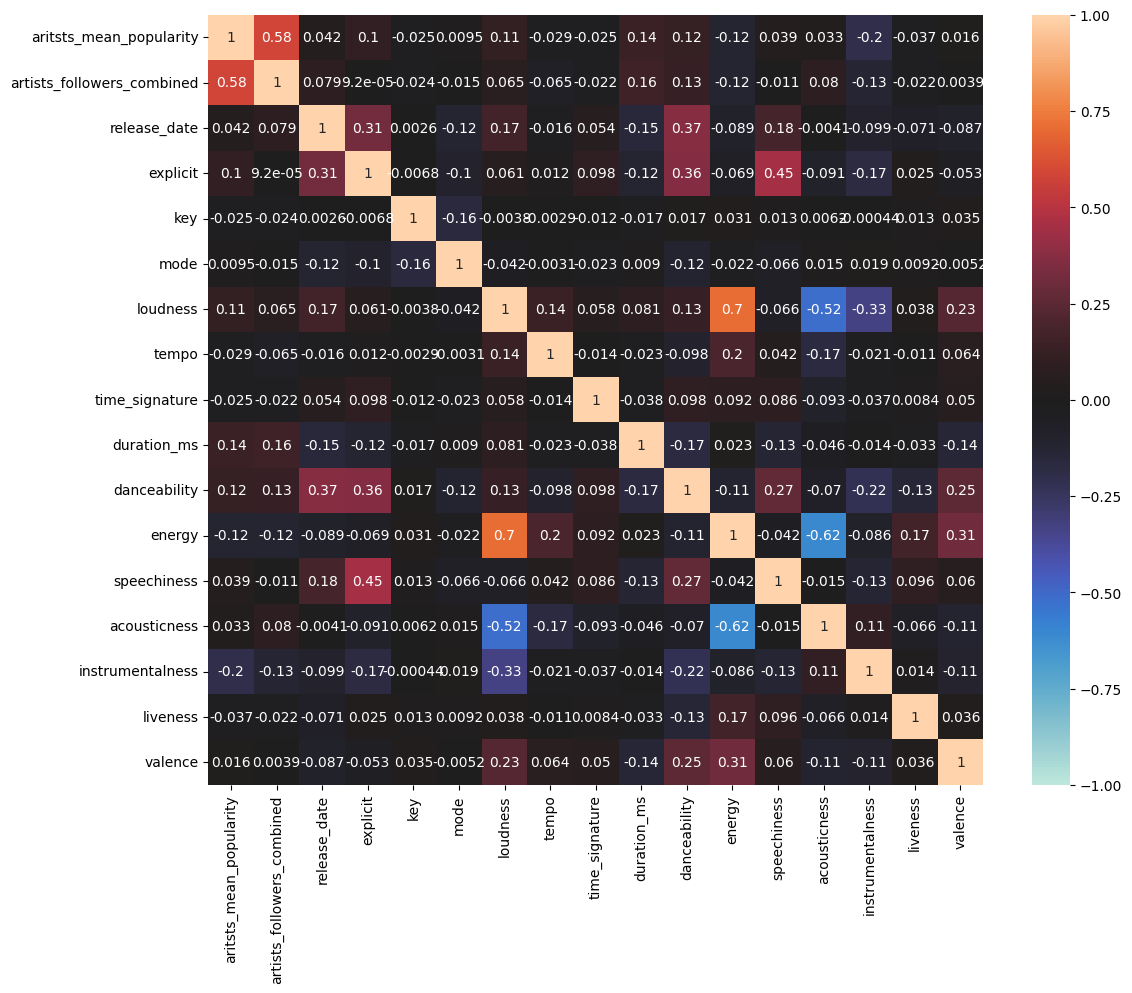

In [21]:
plt.figure(figsize=[12.5, 10])
sns.heatmap(data.drop(target, axis=1).corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [22]:
data.insert(data.columns.get_loc('release_date'), 'days_since_release', (pd.to_datetime('today') - data['release_date']) / np.timedelta64(1, 'D'))
data = data.drop('release_date', axis=1)

# <center>Removing Outliers</center>

In [24]:
from scipy import stats


def get_outlier_counts(df, threshold):
    df = df.copy()
    
    
    threshold_z_scores = stats.norm.ppf(threshold)
    
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    return (z_score_df > threshold_z_scores).sum(axis=0)


def remove_outliers(df, threshold):
    df = df.copy()
    
    threshold_z_scores = stats.norm.ppf(threshold)
    
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    z_score_df = z_score_df > threshold_z_scores
    
    outliers = z_score_df.sum(axis=1)
    outliers = outliers > 0
    outlier_indices = df.index[outliers]
    
    df = df.drop(outlier_indices, axis=0).reset_index(drop=True)
    
    return df

In [25]:
threshold = 0.999999

get_outlier_counts(data, threshold)

aritsts_mean_popularity        14
artists_followers_combined      7
days_since_release              0
explicit                        0
key                             0
mode                            0
loudness                       35
tempo                           0
time_signature                  0
duration_ms                    17
danceability                    0
energy                          0
speechiness                    35
acousticness                    0
instrumentalness              107
liveness                       35
valence                         0
popularity                      0
dtype: int64

In [26]:
rows_before_removal = data.shape[0]
data = remove_outliers(data, threshold)

print(rows_before_removal - data.shape[0], "outliers removed.")

232 outliers removed.


# <center>Encoding</center>

In [27]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    
    dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    
    return df

In [28]:
data = onehot_encode(data, 'key', 'key')
data = onehot_encode(data, 'time_signature', 'ts')

In [29]:
data

,aritsts_mean_popularity,artists_followers_combined,days_since_release,explicit,mode,loudness,tempo,duration_ms,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,popularity,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,ts_3,ts_4,ts_5
0,91.0,1.024779e+08,12.95104,0,1,-2.724,141.020,207853,0.788,0.859,0.0856,0.281000,0.000000,0.0424,0.822,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,67.0,3.235051e+06,11215.95104,0,0,-8.992,143.499,319693,0.430,0.849,0.0563,0.005470,0.000042,0.0727,0.279,41,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,77.0,1.186252e+07,4471.95104,0,1,-7.651,88.968,153653,0.408,0.499,0.0323,0.665000,0.000000,0.1100,0.554,54,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,85.0,3.960430e+07,3124.95104,0,1,-11.540,80.307,276560,0.525,0.334,0.0686,0.641000,0.000000,0.1140,0.185,59,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,87.0,1.171205e+07,1489.95104,1,0,-8.302,79.568,210253,0.417,0.689,0.1780,0.575000,0.000000,0.4960,0.505,74,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7879,55.0,3.327090e+05,3211.95104,0,1,-4.889,105.977,149388,0.534,0.672,0.0338,0.000264,0.247000,0.1160,0.608,58,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7880,81.0,1.769674e+07,10858.95104,0,1,-11.494,99.589,281760,0.535,0.725,0.0307,0.011500,0.097800,0.0824,0.524,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7881,59.0,1.290554e+05,110.95104,0,1,-7.694,165.931,212120,0.629,0.548,0.0334,0.471000,0.000022,0.1040,0.582,71,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7882,90.0,6.585772e+07,1209.95104,0,1,-2.769,176.084,249215,0.502,0.910,0.1070,0.040000,0.000000,0.3190,0.588,64,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# <center>Preprocessing</center>

In [30]:
from sklearn.preprocessing import StandardScaler


X = data.drop(target, axis=1)
X_df = X.copy()
y = data[target]

X = StandardScaler().fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# <center>Model Selection</center>

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

In [33]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}).reset_index(drop=True)
    results = results.sample(25).reset_index(drop=True)
    
    print(f"R2 Score:                        {r2_score(y_test, y_pred):.2%}")
    print(f"Mean Absolute Error (MAE):       {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Max Error:                       {max_error(y_test, y_pred):.2f}")
    
    plt.figure(figsize=[10, 4])
    
    plt.subplot(1, 2, 1)
    ax = sns.scatterplot(results)
    ax.set(xlabel='Index', ylabel='Popularity')
    plt.xlim((0, len(results)-1))
    plt.ylim((0, 100))
    
    plt.subplot(1, 2, 2)
    ax = sns.regplot(x=results['y_test'], y=results['y_pred'])
    ax.set(xlabel='Test', ylabel='Predicted')
    plt.xlim((min(results['y_test']), max(results['y_test'])))
    plt.ylim((min(results['y_pred']), max(results['y_pred'])))

    plt.show()
    

**Linear Regression**

R2 Score:                        24.21%
Mean Absolute Error (MAE):       13.00
Max Error:                       67.71


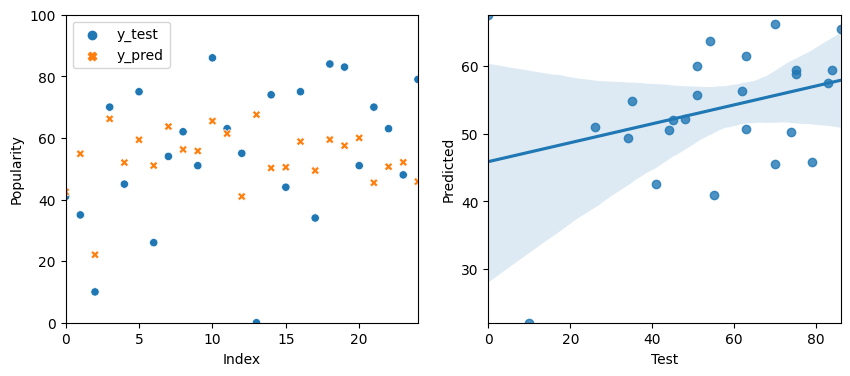

In [34]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

evaluate_model(lr)

**K-Neighbors**

R2 Score:                        18.96%
Mean Absolute Error (MAE):       13.98
Max Error:                       74.30


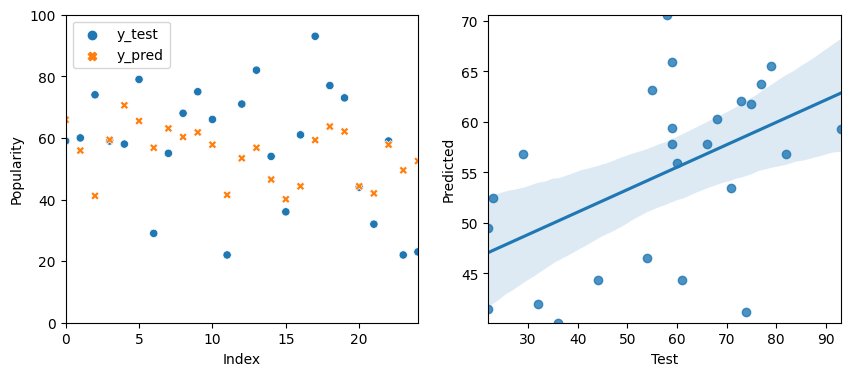

In [35]:
from sklearn.neighbors import KNeighborsRegressor


knr = KNeighborsRegressor(n_neighbors=10)

evaluate_model(knr)

**Decision Tree**

R2 Score:                        50.07%
Mean Absolute Error (MAE):       10.70
Max Error:                       87.00


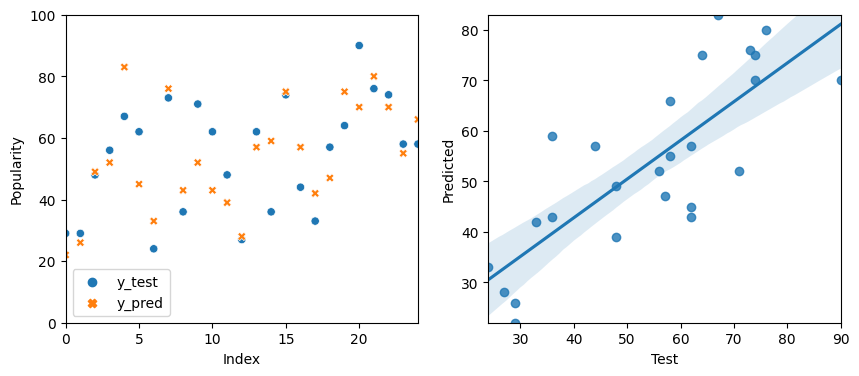

In [36]:
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor()

evaluate_model(dtr)

**Random Forest**

R2 Score:                        71.39%
Mean Absolute Error (MAE):       8.28
Max Error:                       65.83


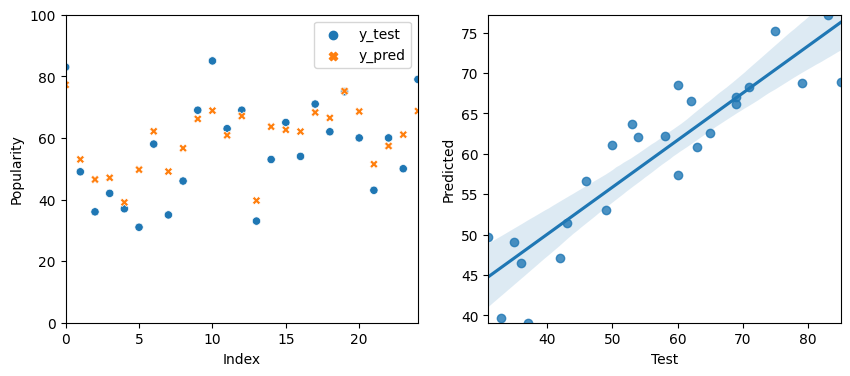

In [37]:
from sklearn.ensemble import RandomForestRegressor

default_params = {
    'n_estimators': 150,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0.0,
    'n_jobs': 1
}

rfr = RandomForestRegressor(
    n_estimators=1974,
    max_depth=19,
    random_state=0,
    n_jobs=-1
)

evaluate_model(rfr)

## Hyperparapeters Tuning

**Gradient Boosting**

R2 Score:                        68.23%
Mean Absolute Error (MAE):       8.76
Max Error:                       66.00


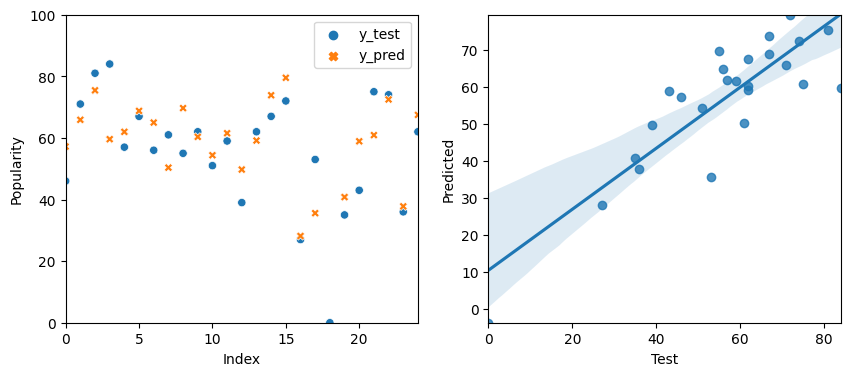

In [38]:
from xgboost import XGBRegressor


xgbr = XGBRegressor()

evaluate_model(xgbr)

**Neural Network (Multilayer Perceptron)**

R2 Score:                        28.29%
Mean Absolute Error (MAE):       13.23
Max Error:                       74.11


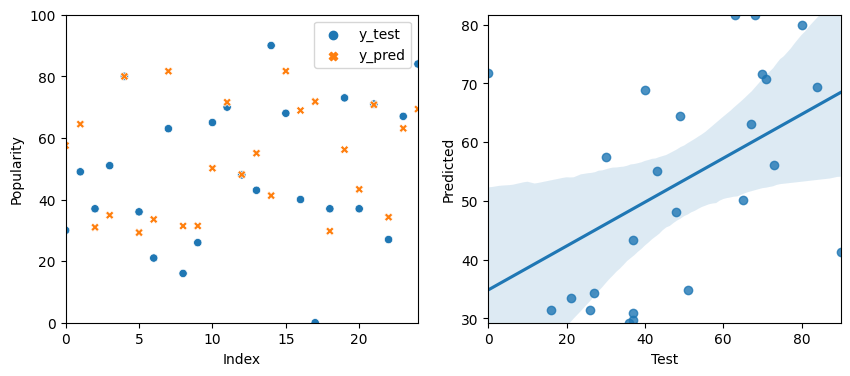

In [39]:
from sklearn.neural_network import MLPRegressor


mlpr_params = {
    'batch_size': 32, 
    'learning_rate_init': 0.001,
    'max_iter': 1000,
    
    'random_state': 0
}

mlpr = MLPRegressor(**mlpr_params)

evaluate_model(mlpr)

### <center>*Notebook Styles*</center>

*Centering plots*

In [40]:
from IPython.core.display import HTML 


HTML(""" 
<style> 
    .output_png { 
        display: table-cell; 
        text-align: center; 
        vertical-align: middle; } 
</style> 
""")